## **Day 3 — Univariate & Bivariate EDA**

**Objective:** Explore distributions, relationships, and segment-level behavior in the cleaned dataset.

**Tasks Completed:**
- **Univariate Analysis**
  - Histogram + KDE for age distribution
  - Boxplot for call duration
- **Categorical Analysis**
  - Frequency tables
  - Bar charts for job categories
- **Numeric–Numeric Analysis**
  - Scatterplot (Age vs Balance)
  - Correlation heatmap for numerical features
- **Numeric–Categorical Analysis**
  - Boxplots (Balance by Job category)
  - Grouped barplot (Subscription by Age Group)
- **Segment Analysis**
  - Customer segmentation based on age groups
- Saved all visual outputs to **`/reports/figures/`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("reports/figures", exist_ok=True)
df = pd.read_csv("data/interim/cleaned_day2.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,age_group
0,58,Management,Married,Tertiary,No,9.226607,Yes,No,Not_Specified,5,May,261,1,-1,0,No,Middle Age
1,44,Technician,Single,Secondary,No,8.993427,Yes,No,Not_Specified,5,May,151,1,-1,0,No,Adult
2,33,Entrepreneur,Married,Secondary,No,8.990068,Yes,Yes,Not_Specified,5,May,76,1,-1,0,No,Adult
3,47,Blue-Collar,Married,Secondary,No,9.161885,Yes,No,Not_Specified,5,May,92,1,-1,0,No,Middle Age
4,33,Blue-Collar,Single,Secondary,No,8.989943,No,No,Not_Specified,5,May,198,1,-1,0,No,Adult


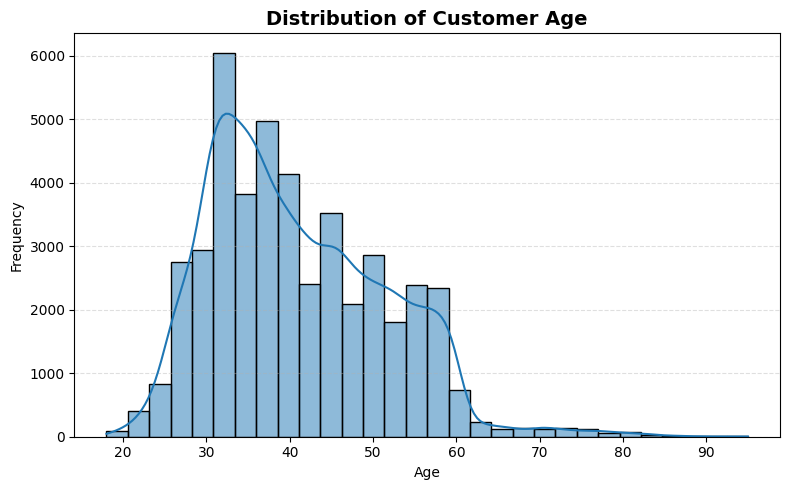

In [14]:
#Univariate Analysis Hist+KDE

import os

os.makedirs("reports/figures", exist_ok=True)

plt.figure(figsize=(8,5))

sns.histplot(
    df["age"],
    kde=True,
    bins=30,
    edgecolor="black"
)

plt.title("Distribution of Customer Age", fontsize=14, weight="bold")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("reports/figures/Distribution_age.png", dpi=300)
plt.show()

### Age Distribution Analysis
**Insight:**  
The age distribution is slightly right-skewed, with most customers concentrated between 30–50 years old. Younger and older customers appear less frequently.

**Interpretation:**  
The dataset is dominated by middle-aged individuals, indicating the campaign mainly reached working-age customers rather than seniors or youth segments.

**Business Meaning:**  
Marketing strategies should primarily target middle-aged groups while exploring growth opportunities among underrepresented age segments.

In [3]:
import os
print(os.path.abspath("reports/figures/Distribution_age.png"))

/Users/a2681/reports/figures/Distribution_age.png


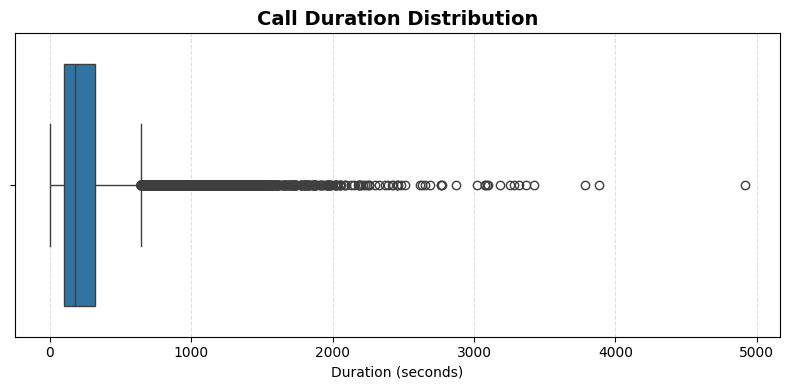

In [4]:
#Box plot

plt.figure(figsize=(8,4))

sns.boxplot(x=df["duration"])

plt.title("Call Duration Distribution", fontsize=14, weight="bold")
plt.xlabel("Duration (seconds)")
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.savefig("reports/figures/call_duration_distribution.png", dpi=300)
plt.tight_layout()
plt.show()

### Call Duration Distribution
**Insight:**  
Call duration is highly right-skewed with many extreme outliers. Most calls are short, but a few last significantly longer.

**Interpretation:**  
Only a small portion of customers require lengthy conversations, suggesting varied engagement levels.

**Business Meaning:**  
Optimizing call strategies for shorter interactions could improve efficiency while reserving longer calls for high-potential leads.

In [5]:
#Categorical Univariate

df["job"].value_counts()

job
Blue-Collar      10020
Management        9458
Technician        7597
Admin.            5171
Services          4154
Retired           2264
Self-Employed     1579
Entrepreneur      1487
Unemployed        1303
Housemaid         1240
Student            938
Name: count, dtype: int64

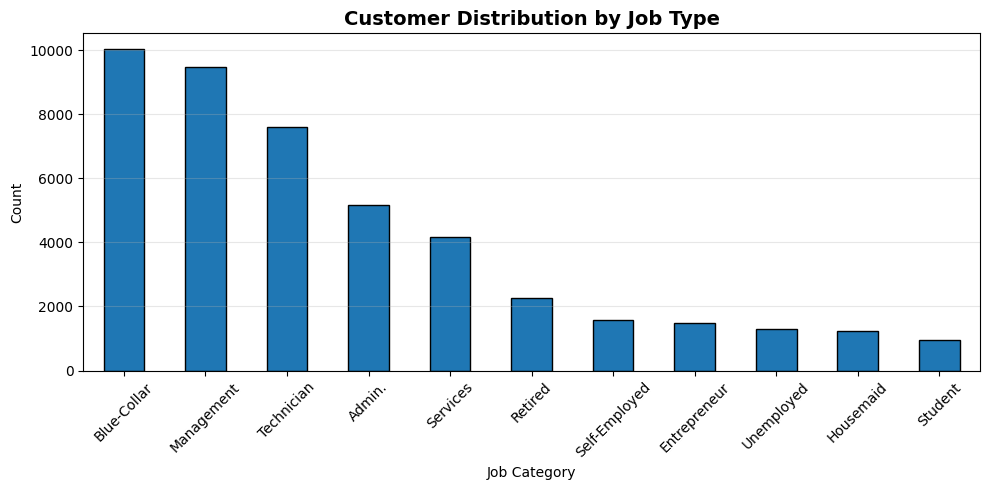

In [6]:
#Bar Chart

plt.figure(figsize=(10,5))

job_counts = df["job"].value_counts().sort_values(ascending=False)

job_counts.plot(kind="bar", edgecolor="black")

plt.title("Customer Distribution by Job Type", fontsize=14, weight="bold")
plt.xlabel("Job Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)

plt.savefig("reports/figures/Job_distribution.png", dpi=300)

plt.tight_layout()
plt.show()

### Customer Distribution by Job
**Insight:**  
Most customers belong to Blue-Collar, Management, and Technician professions, while Students and Housemaids form the smallest groups.

**Interpretation:**  
The dataset is dominated by working-class segments, indicating either campaign reach or dataset sampling characteristics.

**Business Meaning:**  
Campaign messaging may perform best when tailored to working professionals, but niche segments could represent untapped opportunities.

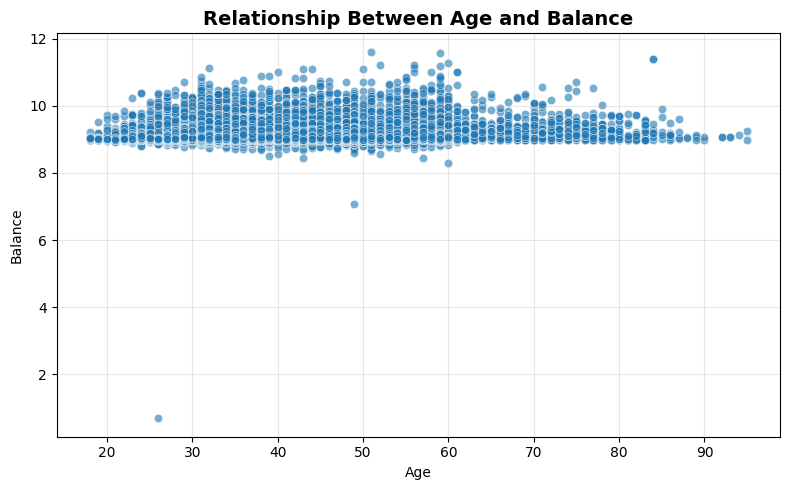

In [15]:
#Numeric vs Numeric

#Scatterplot
plt.figure(figsize=(8,5))

sns.scatterplot(
    x="age",
    y="balance",
    data=df,
    alpha=0.6
)

plt.title("Relationship Between Age and Balance", fontsize=14, weight="bold")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.grid(alpha=0.3)

plt.savefig("reports/figures/Age_vs_balance.png", dpi=300)
plt.tight_layout()
plt.show()

### Relationship Between Age and Balance
**Insight:**  
There is no strong relationship between age and account balance. Data points are widely scattered with no clear upward or downward trend.

**Interpretation:**  
Age alone is not a reliable predictor of financial balance.

**Business Meaning:**  
Customer wealth segmentation should rely on financial indicators rather than demographic variables like age.

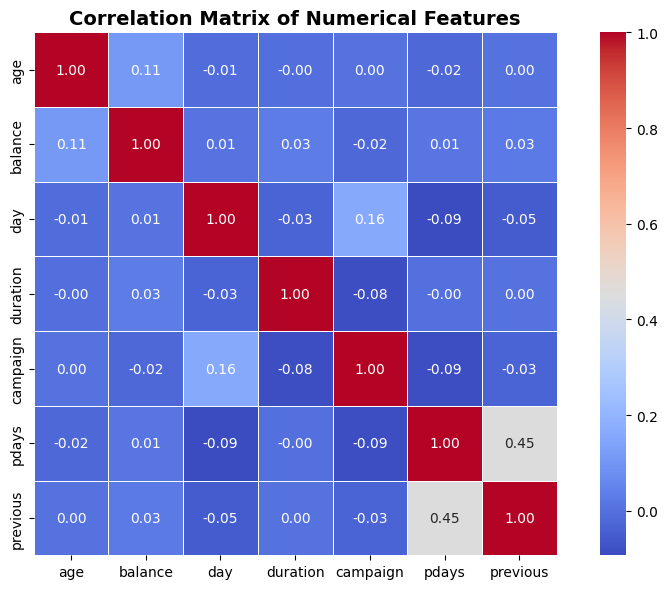

In [8]:
#Correlation Heatmap


plt.figure(figsize=(9,6))

corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)

plt.title("Correlation Matrix of Numerical Features", fontsize=14, weight="bold")

plt.savefig("reports/figures/Correlation_matrix.png", dpi=300)
plt.tight_layout()
plt.show()

### Correlation Analysis of Numerical Features
**Insight:**  
Most numerical variables show very weak correlations with each other. The only moderate relationship exists between previous contacts and days since last contact.

**Interpretation:**  
Customer behavior is influenced by multiple independent factors rather than a single dominant variable.

**Business Meaning:**  
Predictive modeling should include multiple features instead of relying on any single metric.

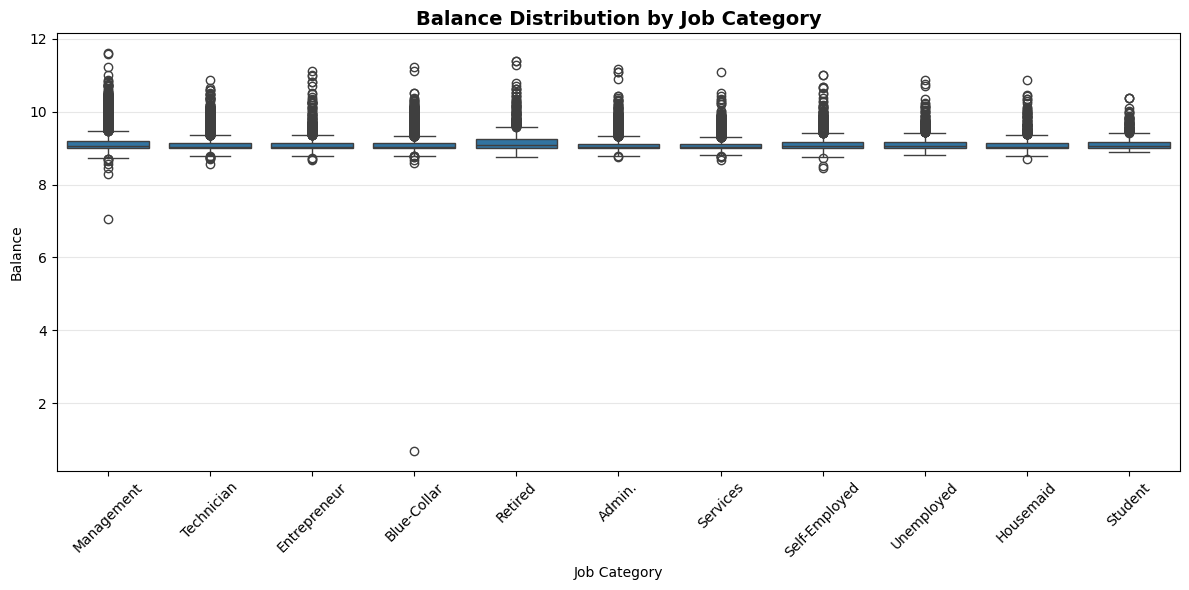

In [17]:
#Numeric vs Categorical

#Boxplot
plt.figure(figsize=(12,6))

sns.boxplot(x="job", y="balance", data=df)

plt.title("Balance Distribution by Job Category", fontsize=14, weight="bold")
plt.xlabel("Job Category")
plt.ylabel("Balance")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)

plt.savefig("reports/figures/Balance_vs_job.png", dpi=300)
plt.tight_layout()
plt.show()

### Balance Distribution by Job Category
**Insight:**  
Median balances are similar across job categories, though variability differs slightly. Outliers are present in all groups.

**Interpretation:**  
Job type does not strongly determine account balance.

**Business Meaning:**  
Financial targeting strategies should prioritize balance-based segmentation instead of profession-based targeting.

In [10]:
#Grouped bar


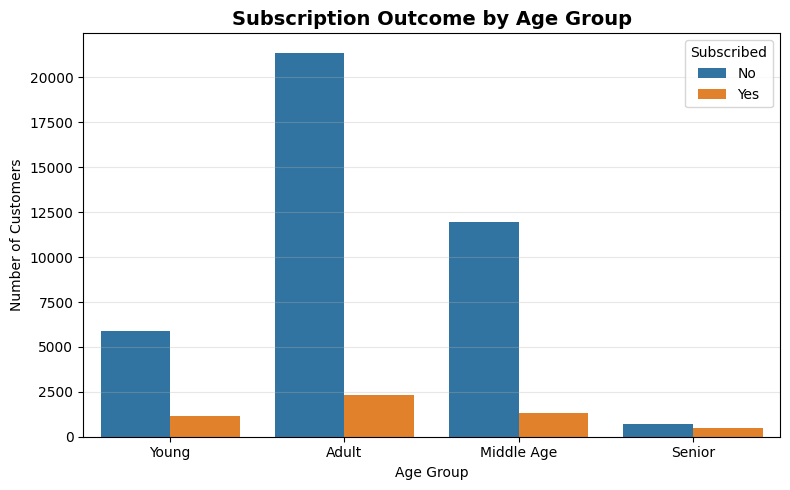

In [11]:
#Segment Analysis
bins = [18,30,45,60,100]
labels = ["Young","Adult","Middle Age","Senior"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)


plt.figure(figsize=(8,5))

sns.countplot(
    x="age_group",
    hue="y",
    data=df,
    order=["Young","Adult","Middle Age","Senior"]
)

plt.title("Subscription Outcome by Age Group", fontsize=14, weight="bold")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.legend(title="Subscribed")
plt.grid(axis="y", alpha=0.3)

plt.savefig("reports/figures/Subscription_by_age.png", dpi=300)
plt.tight_layout()
plt.show()

### Subscription Outcome by Age Group
**Insight:**  
Adults show the highest number of subscriptions, followed by Middle-Age, Young, and Senior groups.

**Important Note:**  
This chart shows counts, not conversion rates.

**Interpretation:**  
Higher subscription numbers among adults are likely due to their larger representation in the dataset rather than higher responsiveness.

**Business Meaning:**  
To identify the most responsive age segment, conversion rate analysis is required.

In [20]:
import os
os.makedirs("data/processed", exist_ok=True)

df.to_csv("data/processed/day3_eda_ready.csv", index=False)

## Day 3 Summary

Univariate and bivariate analysis revealed important patterns in customer demographics, financial status, and campaign interaction behavior. Several variables exhibit skewness, and relationships between variables are generally weak, suggesting complex customer decision dynamics.

### **Key Insights**
- Customer age is mostly concentrated between 30–50.
- Duration and campaign features show skewness and outliers.
- Most numerical variables have weak correlations.
- Majority customers belong to technician, admin, and blue-collar jobs.
- Subscription behavior varies across customer segments.

---

**Status:** Day 3 EDA successfully completed. Dataset patterns, distributions, and relationships understood and documented.

In [21]:
import os
os.makedirs("data/processed", exist_ok=True)

df.to_csv("data/processed/day3_eda_ready.csv", index=False)